# 4. Изучение закономерностей, определяющих успешность игр

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

In [82]:
import pandas as pd
data = pd.read_csv('games.csv')   

In [83]:
data = data.rename(columns={'Name':'название игры'})
data = data.rename(columns={'Platform':'платформа'})
data = data.rename(columns={'Year_of_Release':'год_выпуска'})
data = data.rename(columns={'Genre':'жанр_игры'})
data = data.rename(columns={'NA_sales':'продажи в С.Америке(млн)'})
data = data.rename(columns={'EU_sales':'продажи в Европе'})
data = data.rename(columns={'JP_sales':'продажи в Японии'})
data = data.rename(columns={'Other_sales':'продажи в др.странах'})
data = data.rename(columns={'Critic_Score':'оценка критиков'})
data = data.rename(columns={'User_Score':'оценка пользователей'})
data = data.rename(columns={'Rating':'рейтинг ESRB'})
data.head(5)

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [84]:
data.isna().sum()

название игры                  2
платформа                      0
год_выпуска                  269
жанр_игры                      2
продажи в С.Америке(млн)       0
продажи в Европе               0
продажи в Японии               0
продажи в др.странах           0
оценка критиков             8578
оценка пользователей        6701
рейтинг ESRB                6766
dtype: int64

In [85]:
data['название игры'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   название игры             16713 non-null  object 
 1   платформа                 16715 non-null  object 
 2   год_выпуска               16446 non-null  float64
 3   жанр_игры                 16713 non-null  object 
 4   продажи в С.Америке(млн)  16715 non-null  float64
 5   продажи в Европе          16715 non-null  float64
 6   продажи в Японии          16715 non-null  float64
 7   продажи в др.странах      16715 non-null  float64
 8   оценка критиков           8137 non-null   float64
 9   оценка пользователей      10014 non-null  object 
 10  рейтинг ESRB              9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [87]:
data.describe().round(2)

,год_выпуска,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


array([[<AxesSubplot:title={'center':'год_выпуска'}>,
        <AxesSubplot:title={'center':'продажи в С.Америке(млн)'}>],
       [<AxesSubplot:title={'center':'продажи в Европе'}>,
        <AxesSubplot:title={'center':'продажи в Японии'}>],
       [<AxesSubplot:title={'center':'продажи в др.странах'}>,
        <AxesSubplot:title={'center':'оценка критиков'}>]], dtype=object)

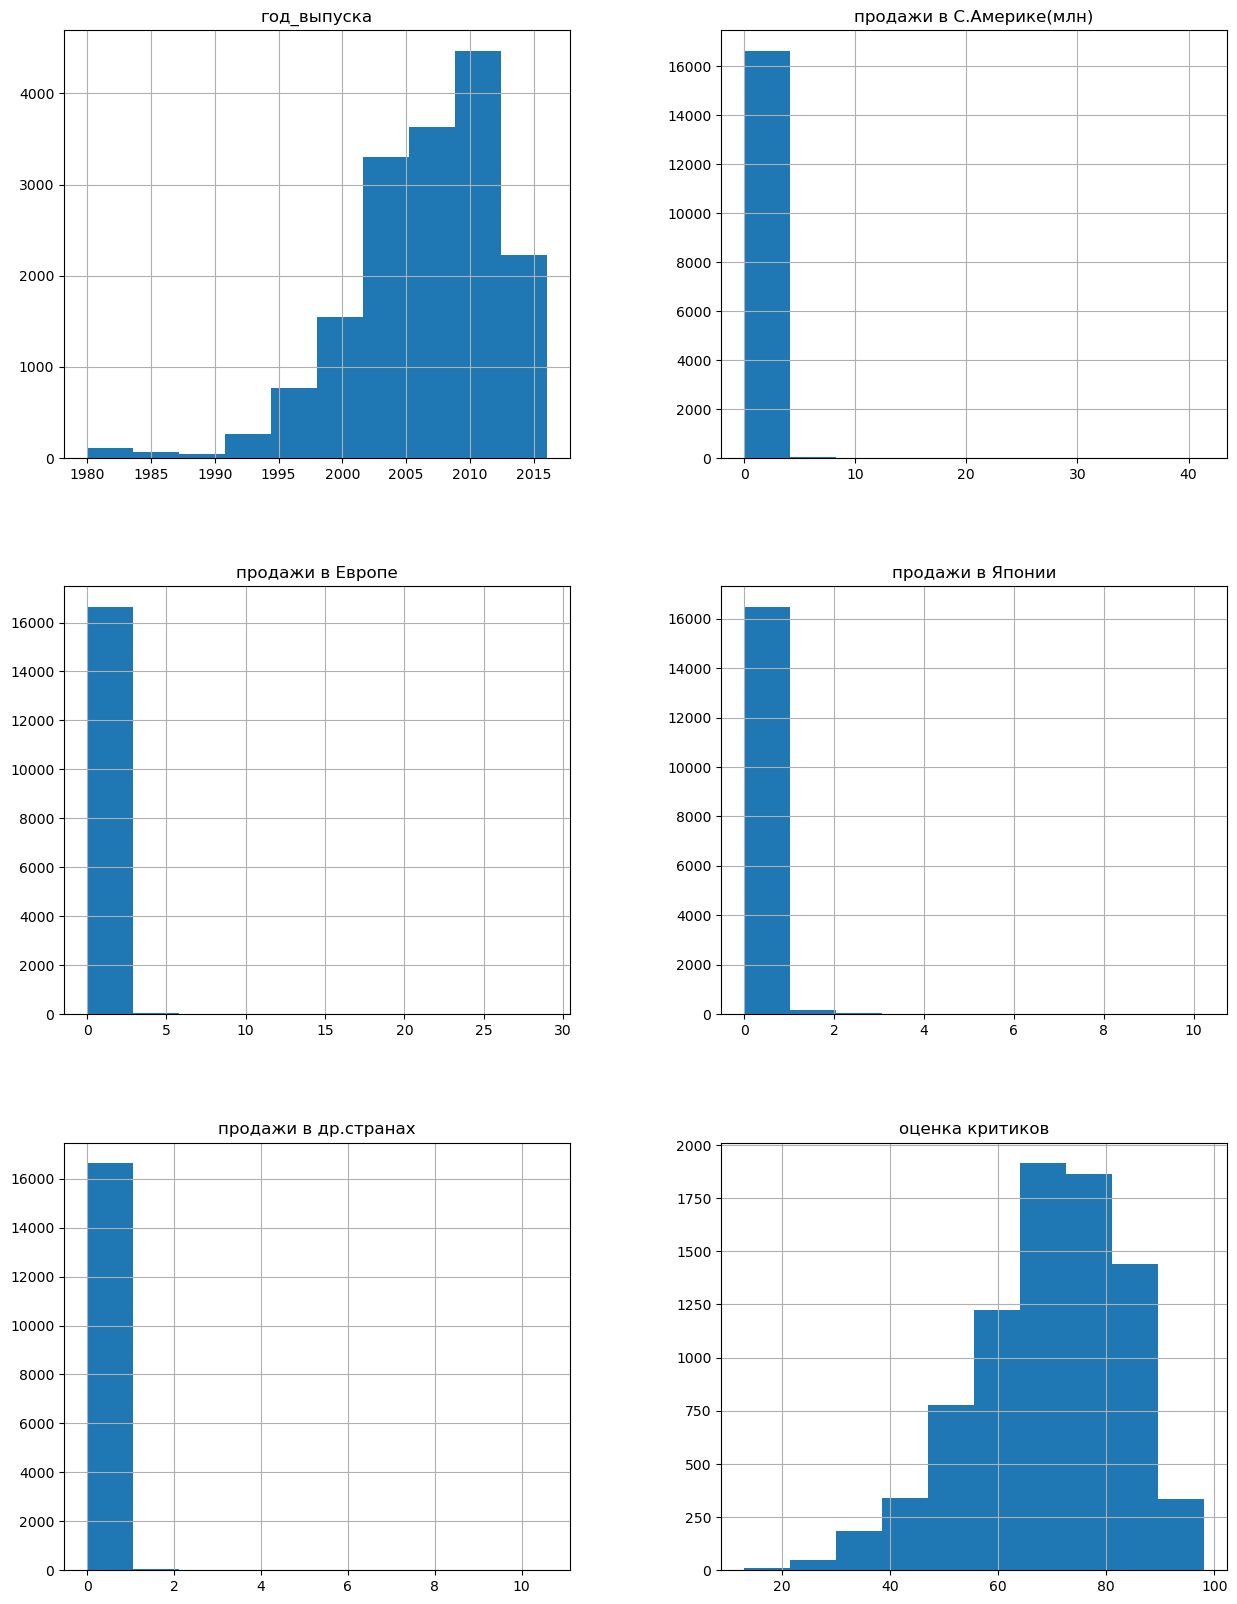

In [88]:
data.hist(figsize=(15, 20))

**Предобработка данных**

Cтолбец name отвечает за название компьютерной игры. По данной ячейке мы не можем рассчитать среднее значение или медиану. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных

In [89]:
# удаляем строки с пустыми значениями в столбцах
data.dropna(subset = ['название игры', 'год_выпуска'], inplace = True)
data.isna().sum()

название игры                  0
платформа                      0
год_выпуска                    0
жанр_игры                      0
продажи в С.Америке(млн)       0
продажи в Европе               0
продажи в Японии               0
продажи в др.странах           0
оценка критиков             8461
оценка пользователей        6605
рейтинг ESRB                6676
dtype: int64

In [90]:
# замена пропусков и типа данных
data['год_выпуска'] = data['год_выпуска'].astype(int)
data['оценка критиков'] = data['оценка критиков'].fillna(0) 
data['оценка критиков'] = data['оценка критиков'].astype(int)
data['оценка пользователей'] = data['оценка пользователей'].fillna(0)  
data['рейтинг ESRB'] = data['рейтинг ESRB'].fillna(0) 
data.fillna(data.mean())

C:\Users\Анна\AppData\Local\Temp\ipykernel_18056\3698322659.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,0


In [91]:
data.head(10)

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   название игры             16444 non-null  object 
 1   платформа                 16444 non-null  object 
 2   год_выпуска               16444 non-null  int32  
 3   жанр_игры                 16444 non-null  object 
 4   продажи в С.Америке(млн)  16444 non-null  float64
 5   продажи в Европе          16444 non-null  float64
 6   продажи в Японии          16444 non-null  float64
 7   продажи в др.странах      16444 non-null  float64
 8   оценка критиков           16444 non-null  int32  
 9   оценка пользователей      16444 non-null  object 
 10  рейтинг ESRB              16444 non-null  object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


In [93]:
data.isna().sum()

название игры               0
платформа                   0
год_выпуска                 0
жанр_игры                   0
продажи в С.Америке(млн)    0
продажи в Европе            0
продажи в Японии            0
продажи в др.странах        0
оценка критиков             0
оценка пользователей        0
рейтинг ESRB                0
dtype: int64

In [94]:
data.describe().round(1)

,год_выпуска,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков
count,16444.0,16444.0,16444.0,16444.0,16444.0,16444.0
mean,2006.5,0.3,0.1,0.1,0.0,33.5
std,5.9,0.8,0.5,0.3,0.2,35.8
min,1980.0,0.0,0.0,0.0,0.0,0.0
25%,2003.0,0.0,0.0,0.0,0.0,0.0
50%,2007.0,0.1,0.0,0.0,0.0,0.0
75%,2010.0,0.2,0.1,0.0,0.0,70.0
max,2016.0,41.4,29.0,10.2,10.6,98.0


Count — количество значений. Mean — среднее значение. Std — стандартное отклонение значения. Min — минимальное значение. Max — максимальное значение. 25% — первый квартиль, означающий, что 25% значений в столбце ниже этого значения. 50% — медиана, означающая, что половина значений в столбце ниже этого значения. 75% — третий квартиль, означающий, что 75% значений в столбце ниже этого значения. Эти показатели помогают понять, как распределены значения в столбце. Они также позволяют увидеть, есть ли в столбце какие-либо выбросы.

In [95]:
data['название игры'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [96]:
data['платформа'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [97]:
data['год_выпуска'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [98]:
data['жанр_игры'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [99]:
data['оценка критиков'].unique()

array([76,  0, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

In [100]:
data['оценка пользователей'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [101]:
# создадим отдельную таблицу для проведения общих расчетов
data_all = data

Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на Nan

In [102]:
# tbd мешает расчетам
data.loc[(data['оценка пользователей'] == 'tbd'), 'оценка пользователей'] =  0
data['оценка пользователей'] = data['оценка пользователей'].astype(float)

In [103]:
data['оценка пользователей'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

In [104]:
data['рейтинг ESRB'].unique()

array(['E', 0, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [105]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
data['суммарные_продажи'] = data['продажи в С.Америке(млн)'] + data['продажи в Европе'] + data['продажи в Японии']+ data['продажи в др.странах']
data.head(10)

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB,суммарные_продажи
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,0,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,0,28.31


                  В 6 столбцах есть пустые ячейки. Приступим к изучению.

- столбец ['название игры'] отвечает за название компьютерной игры. По данной ячейке мы не можем рассчитать среднее значение или медиану. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных, или у игры не было утверждено официальное название и поэтому ячейка оказалась пуста.


- в столбцах ['оценка критиков'],	['оценка пользователей'] заменим 0, т.к. пропуски могут повлиять на дальнейшую аналитику. Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки.


- со столбцом ['год_выпуска'] есть названия игр с указанием года выпуска и в итоге будет выглядеть не совсем логично (на примере ИД16373 игра с названием 'PDC World Championship Darts 2008' и год не указан.) Поэтому предлагаю удалить пропуска, чтобы не было нелогичного установления года выпуска. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена.


- столбец ['жанр_игры'] так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились к какому именно жанру относится видеоигра.


- столбец ['рейтинг ESRB'] так же заменим 0, т.к. мы не сможем понять возрастное ограничение, если не будем знать это точно.

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.

In [106]:
# первая выгрузка
группа_1 = data.groupby(['платформа', 'год_выпуска'])['название игры'].count()
группа_1

платформа  год_выпуска
2600       1980            9
           1981           46
           1982           36
           1983           11
           1984            1
                          ..
XB         2008            1
XOne       2013           19
           2014           61
           2015           80
           2016           87
Name: название игры, Length: 238, dtype: int64

In [107]:
# 2 выгрузка
группа_2 = data.groupby(['год_выпуска'])['название игры'].count()
группа_2

год_выпуска
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: название игры, dtype: int64

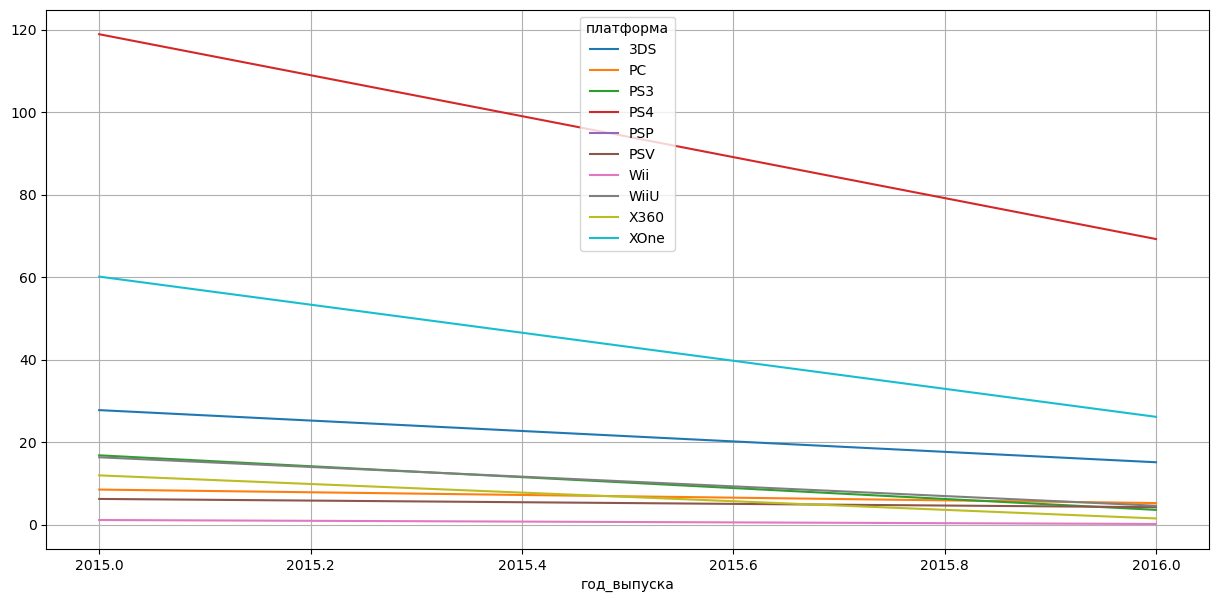

In [108]:
# оставим в выгрузке только нужные года
data = data.query("2015 <= год_выпуска <= 2016")
import matplotlib.pyplot as plt
#построим график распределения по годам
data.pivot_table(index='год_выпуска', columns = 'платформа', values='суммарные_продажи', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

Из данной выгрузки мы можем выделить две игровые платформы с наибольшими суммарными продажами. 
это платформы: Xbox One, PS4, тем самым мы отсеиваем мало продаваемые позиции и устаревшие.

In [109]:
# обновим выгрузку и оставим только интересующие нас платформы
data_plat = data.query("платформа == ['XOne', 'PS4']")
data

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB,суммарные_продажи
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


На графике выше мы видим самые продаваемые позиции за период с 2015 по 2016 года. Обратим внимание, что все платформы, кроме Xbox One, PS4 к 2016 году приравниваются к 0 продаж.

За какой характерный срок появляются новые и исчезают старые платформы?

Новые модели, если не брать в расчет PS2, появлялись с регулярностью в 1 год, за исключением двух последних платформ, которые появились одновременно.

Исчезновение старых моделей так же было постепенно, относительно их появления, за исключением платформ Nintendo. Хоть они и появились в разные периоды, но эпоха Nintendo закончила в один год.

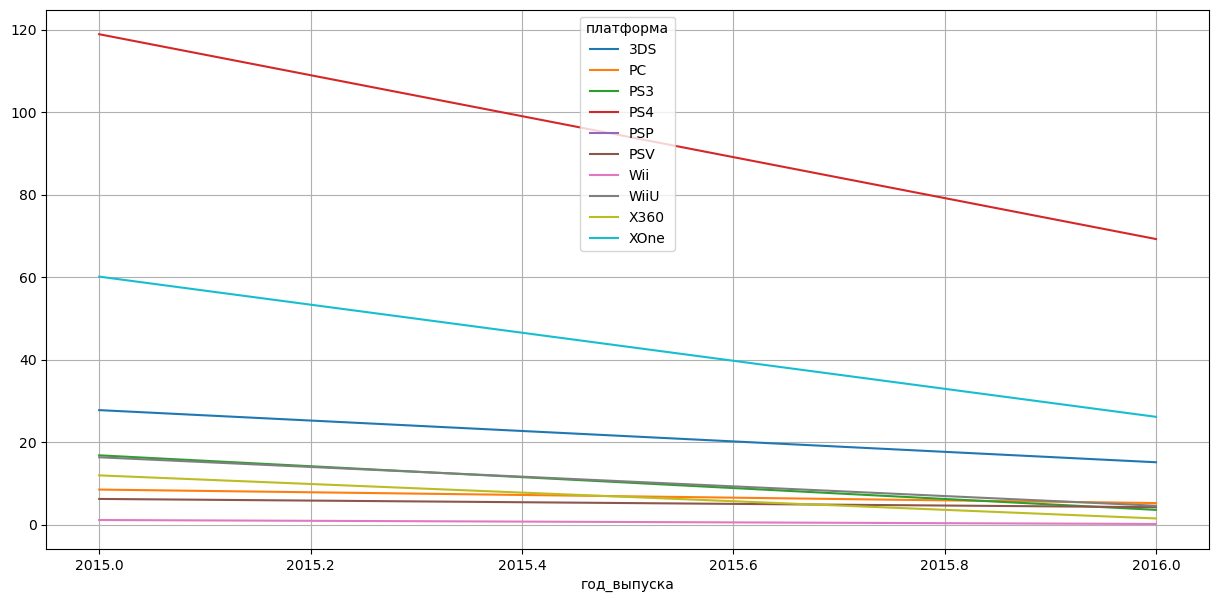

In [110]:
data = data.query("2015 <= год_выпуска <= 2016")
data.pivot_table(index='год_выпуска', columns = 'платформа', values='суммарные_продажи', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

In [111]:
data.groupby('платформа')['суммарные_продажи'].describe()

,count,mean,std,min,25%,50%,75%,max
платформа,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


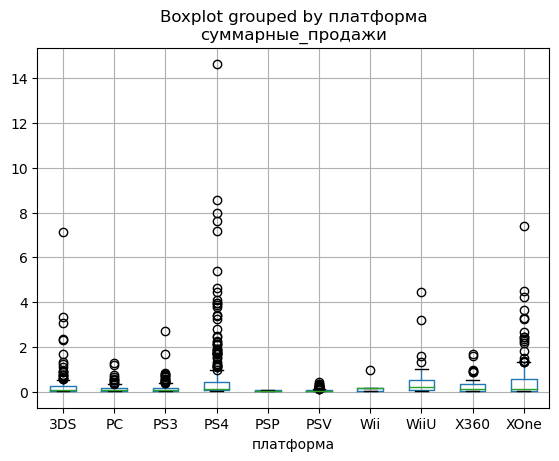

In [112]:
# ящик с усами

data.boxplot(column='суммарные_продажи', by='платформа')
plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Для диагностики возьмем платформу PS4, т.к. у этой платформы значительные продажи в 2016 году.

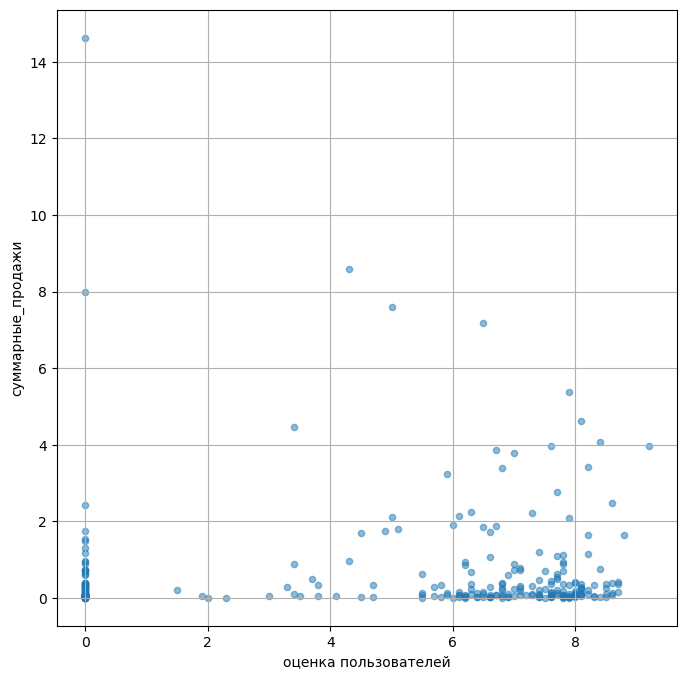

In [113]:
# выведем таблицу рассеивания по платформе отобразив отзывы пользователей
data[data['платформа']=='PS4'].plot(x='оценка пользователей', y='суммарные_продажи', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

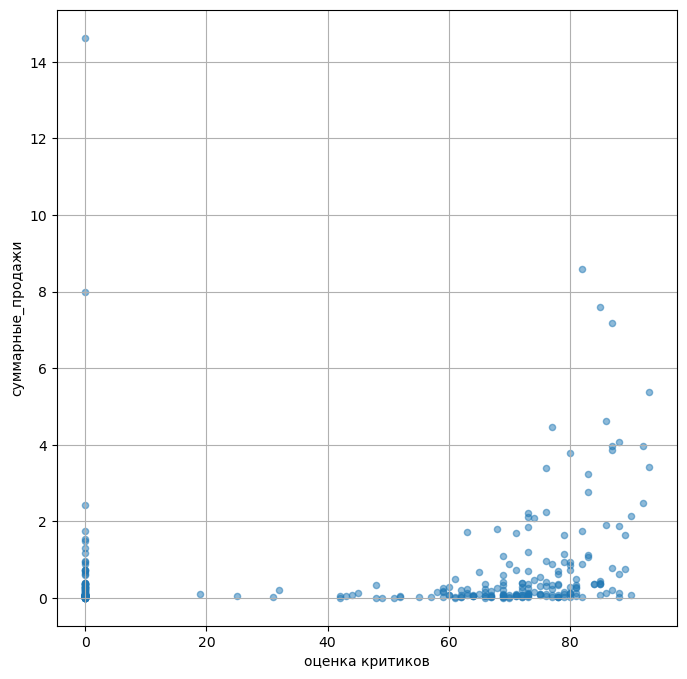

In [114]:
# выведем таблицу рассеивания по платформе отобразив отзывы пользователей
data[data['платформа']=='PS4'].plot(x='оценка критиков', y='суммарные_продажи', kind='scatter', alpha=0.5, figsize=(8,8), grid=True)
plt.show()

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

In [115]:
data['оценка пользователей'].corr(data['суммарные_продажи'])

0.1397915988645013

значение близко к нулю, значит связь слабая, либо отсутствует вовсе

In [116]:
data['оценка критиков'].corr(data['суммарные_продажи'])

0.21871826595210225

корреляция положительная. существует обратная зависимость величин (чем больше одна, тем меньше другая)

In [117]:
data.groupby('жанр_игры')['суммарные_продажи'].describe()

,count,mean,std,min,25%,50%,75%,max
жанр_игры,,,,,,,,
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63


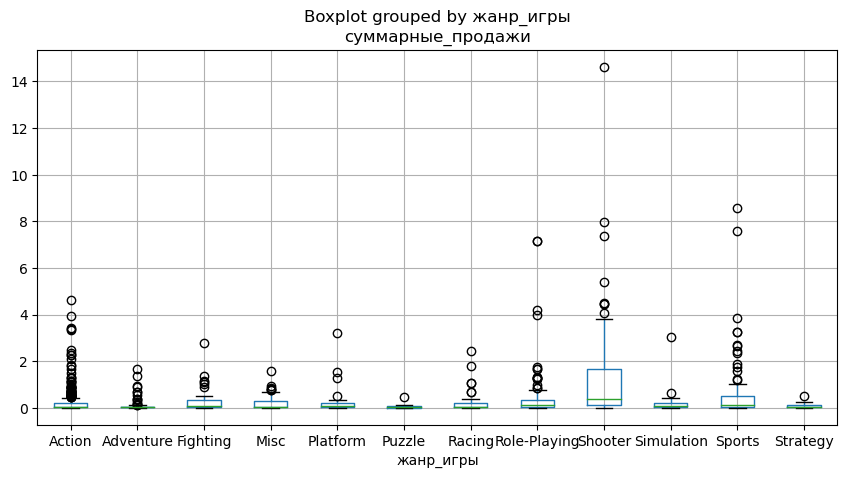

In [118]:
data.boxplot(column='суммарные_продажи', by='жанр_игры', figsize=(10,5))
plt.show()

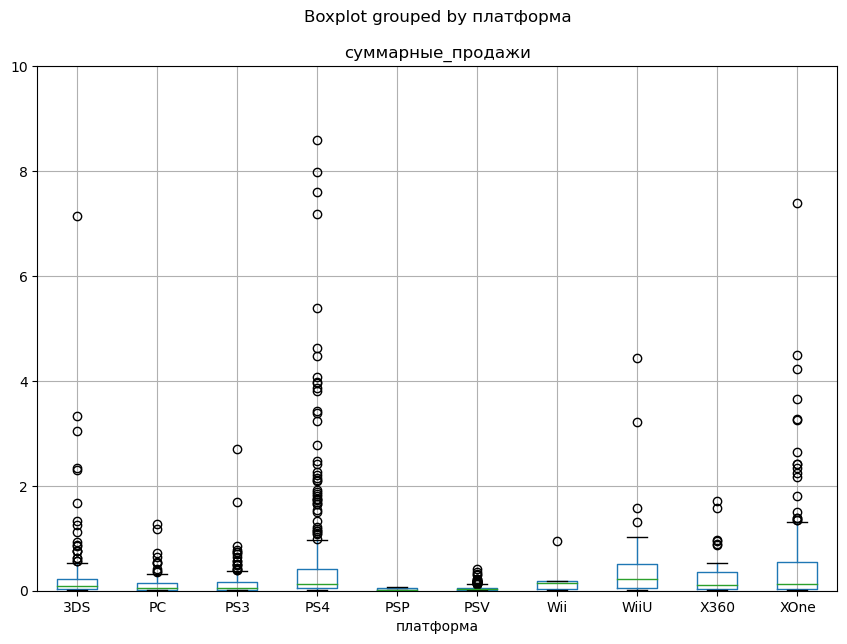

In [119]:
# теперь сужаем диапазон
data.boxplot(column='суммарные_продажи', by='платформа', figsize=(10,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 10)
plt.show()

топ 5 жанров : Action, Shooter, Sports, Role-Playing, Adventure

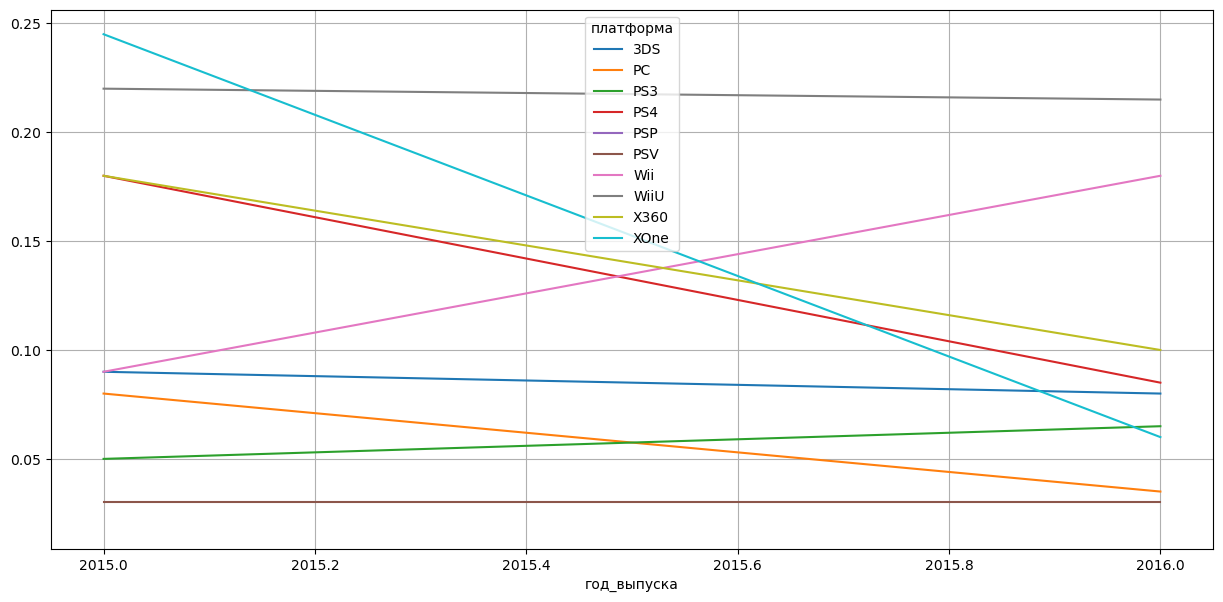

In [120]:
data = data.query("2015 <= год_выпуска <= 2016")
data.pivot_table(index='год_выпуска', columns = 'платформа', values='суммарные_продажи', aggfunc='median').plot(grid=True, figsize=(15, 7))
plt.show()

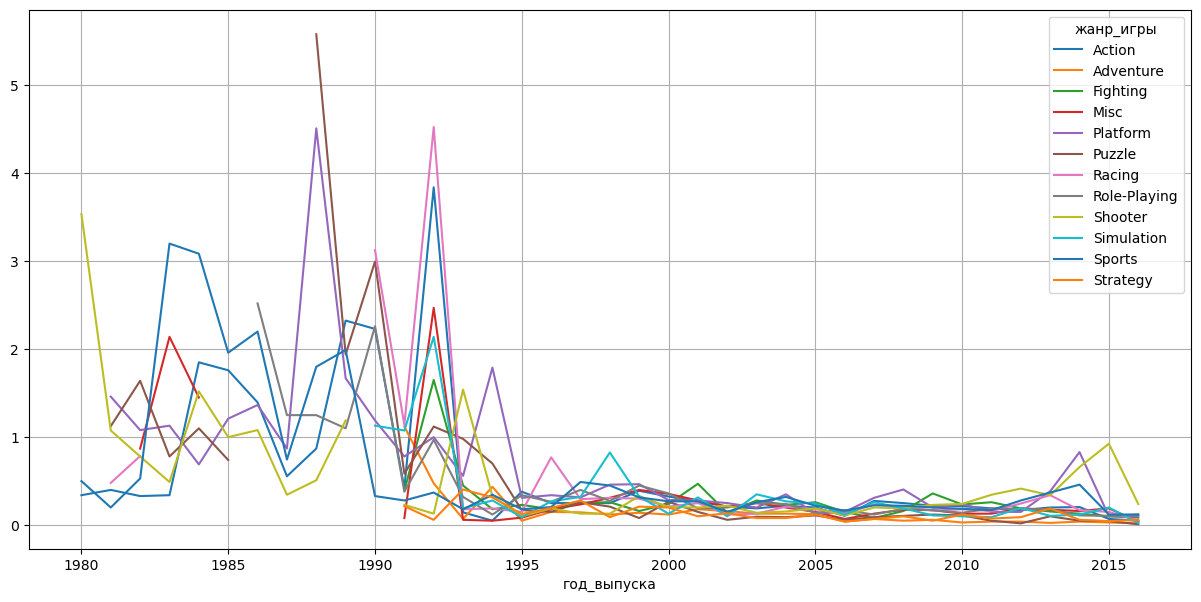

In [121]:
data_all.pivot_table(index='год_выпуска', columns = 'жанр_игры', values='суммарные_продажи', aggfunc='median').plot(grid=True, figsize=(15, 7))
plt.show()

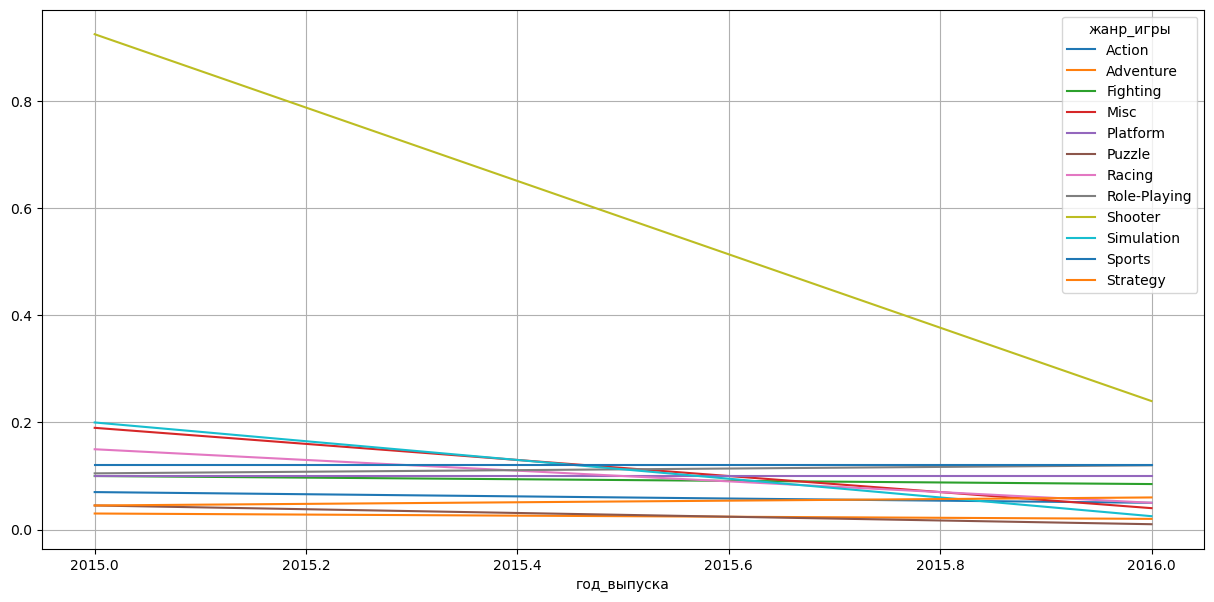

In [122]:
data_all = data_all.query("2015 <= год_выпуска <= 2016")
data_all.pivot_table(index='год_выпуска', columns = 'жанр_игры', values='суммарные_продажи', aggfunc='median').plot(grid=True, figsize=(15, 7))
plt.show()

 жанры, где игры стабильно приносят высокий доход : Action, Platform, Fighting

                                   Медианные продажи

In [123]:
# сводная таблица
data_top5 = data_all.pivot_table(
    index = 'платформа',
    values = 'оценка пользователей',
    aggfunc = 'sum').sort_values('оценка пользователей', ascending = False)
data_top5 = data_top5[0:5]
data_top5

,оценка пользователей
платформа,
PS4,1301.9
XOne,791.6
PC,528.9
PSV,281.1
3DS,247.6


**Вывод по исследовательскому анализу данных:**

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.


- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.


- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.


- Больше всего продаются игры на Sony Playstation и Xbox 360


- Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.


- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

                            
                            Портреты пользователей каждого региона

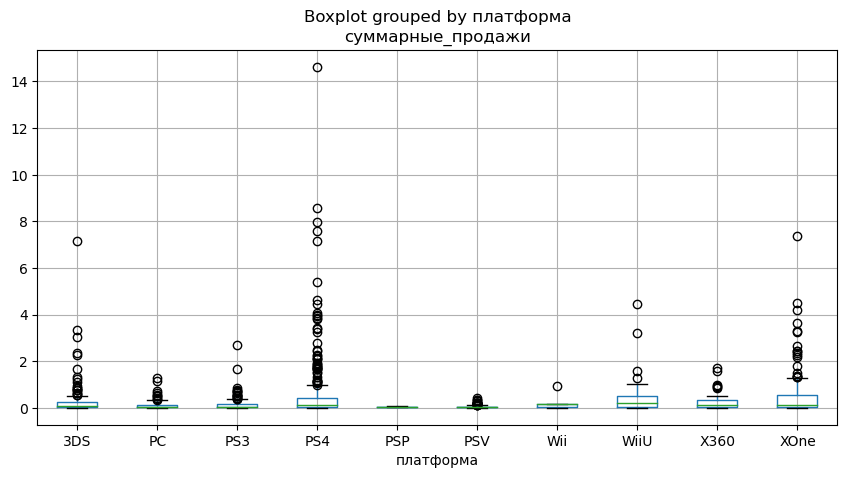

In [124]:
data.boxplot(column='суммарные_продажи', by='платформа', figsize=(10,5))
plt.show()

In [125]:
data.head(5)

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB,суммарные_продажи
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39


                       Для пользователя региона (Северная Америка): 

In [126]:
# сводная таблица Америки
data_America = data_all.pivot_table(
    index = 'платформа',
    values = 'продажи в С.Америке(млн)', 
    aggfunc = 'sum').sort_values('продажи в С.Америке(млн)', ascending = False)
data_America = data_America[0:5]
data_America

,продажи в С.Америке(млн)
платформа,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


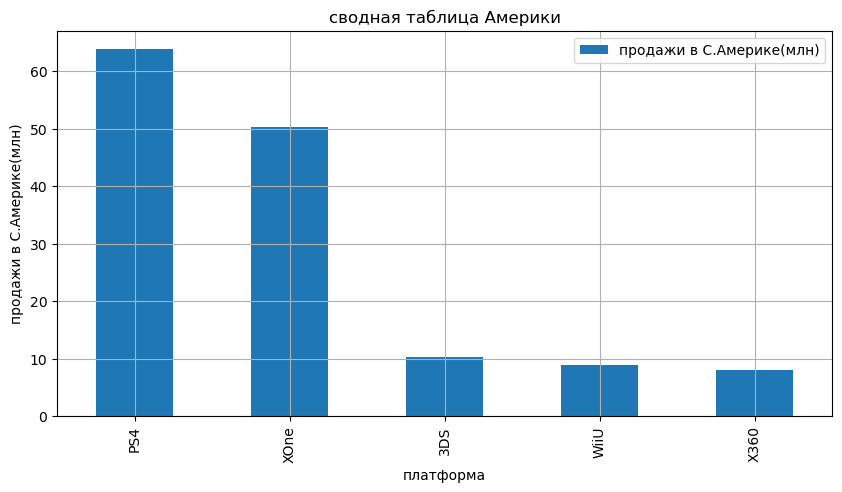

In [127]:
data_America.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('сводная таблица Америки')
plt.xlabel('платформа')
plt.ylabel('продажи в С.Америке(млн)')
plt.show()

Самые популярные платформы (топ-5) - X360, PS2, Wii, PS3, DS  

In [128]:
# сводная таблица Америки
data_America_1 = data_all.pivot_table(
    index = 'жанр_игры',
    values = 'продажи в С.Америке(млн)', 
    aggfunc = 'sum').sort_values('продажи в С.Америке(млн)',ascending = False )
data_America_1 = data_America_1[0:5]
data_America_1


,продажи в С.Америке(млн)
жанр_игры,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


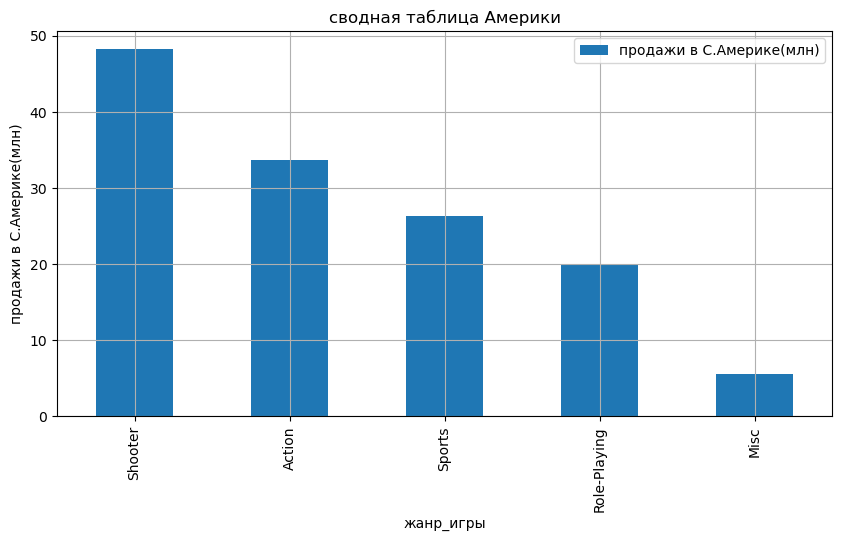

In [129]:
data_America_1.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('сводная таблица Америки')
plt.xlabel('жанр_игры')
plt.ylabel('продажи в С.Америке(млн)')
plt.show()

рейтинг ESRB

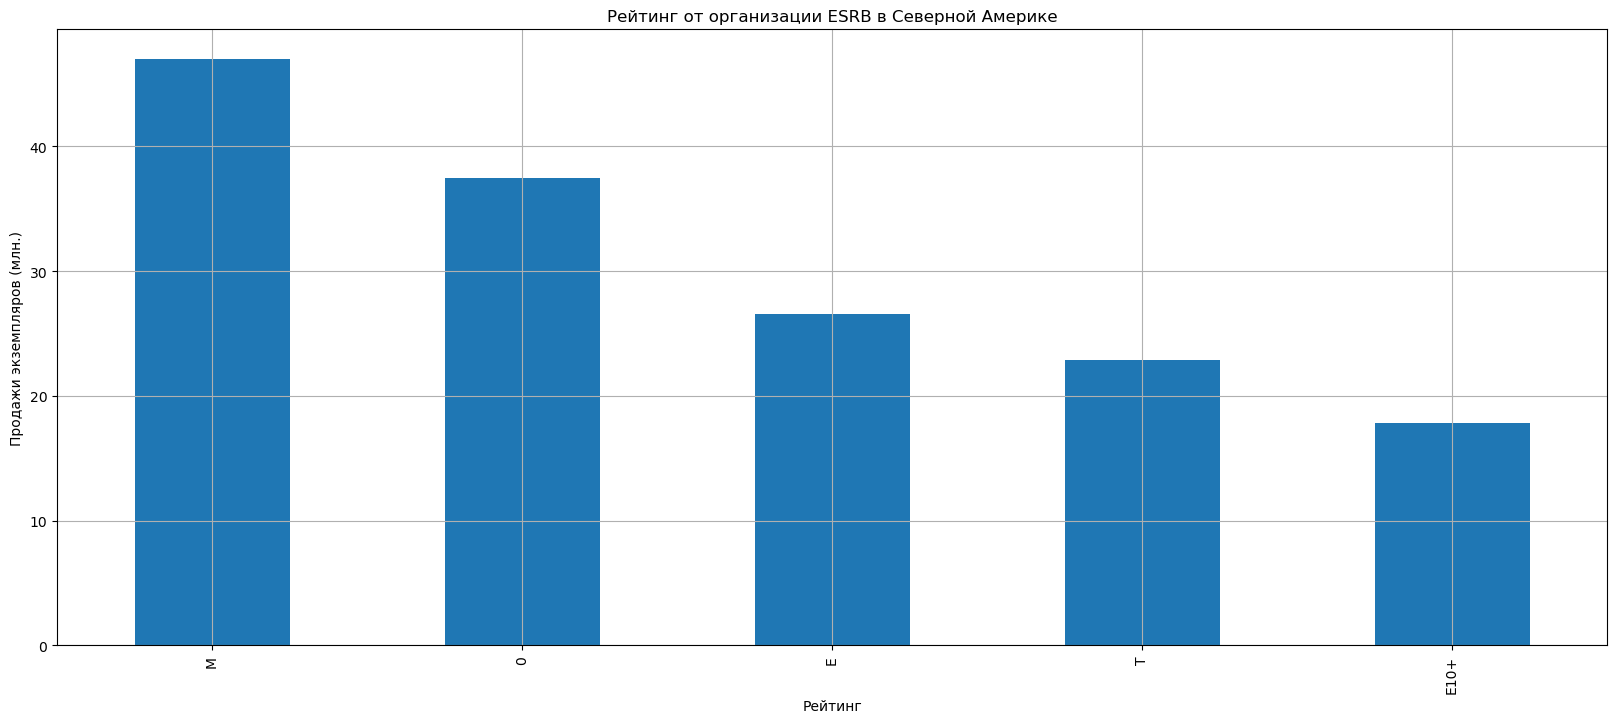

In [130]:
#  Рейтинг от организации ESRB в Северной Америке
#группируем по жанрам
rating_na = data.groupby('рейтинг ESRB')['продажи в С.Америке(млн)'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'рейтинг ESRB', y = 'продажи в С.Америке(млн)', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

                                 Для пользователя региона (Европа): 

In [131]:
# сводная таблица Европы
data_evro = data.pivot_table(
    index = 'платформа',
    values = 'продажи в Европе', 
    aggfunc = 'sum').sort_values('продажи в Европе', ascending = False)
data_evro = data_evro[0:5]
data_evro

,продажи в Европе
платформа,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


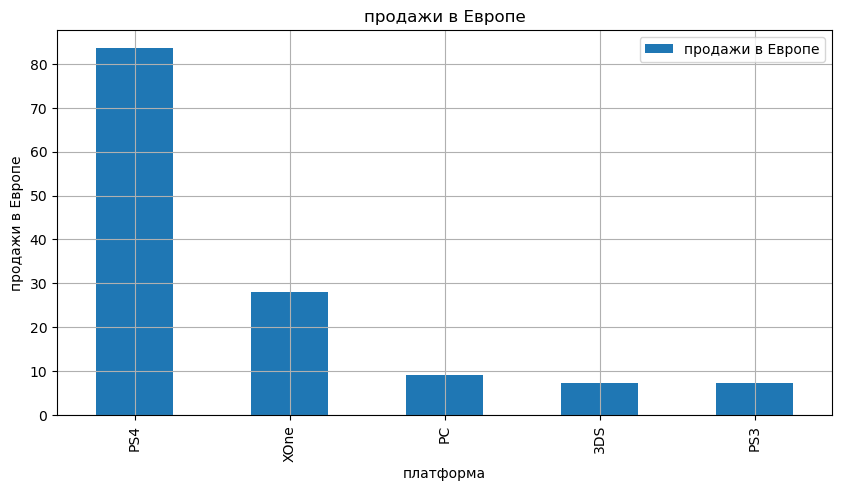

In [132]:
data_evro.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в Европе')
plt.xlabel('платформа')
plt.ylabel('продажи в Европе')
plt.show()

In [133]:
# сводная таблица Европы
data_evro_1 = data.pivot_table(
    index = 'жанр_игры',
    values = 'продажи в Европе', 
    aggfunc = 'sum').sort_values('продажи в Европе', ascending = False)
data_evro_1 = data_evro_1[0:5]
data_evro_1

,продажи в Европе
жанр_игры,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


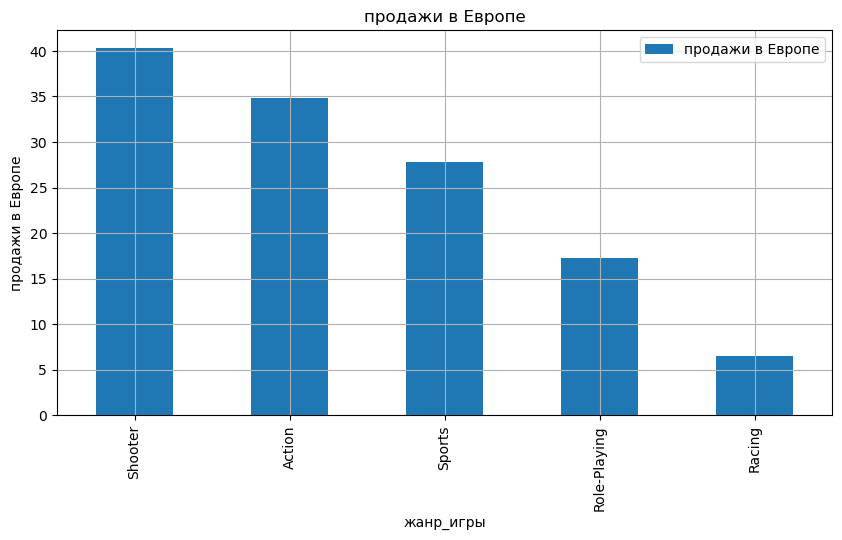

In [134]:
data_evro_1.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в Европе')
plt.xlabel('жанр_игры')
plt.ylabel('продажи в Европе')
plt.show()

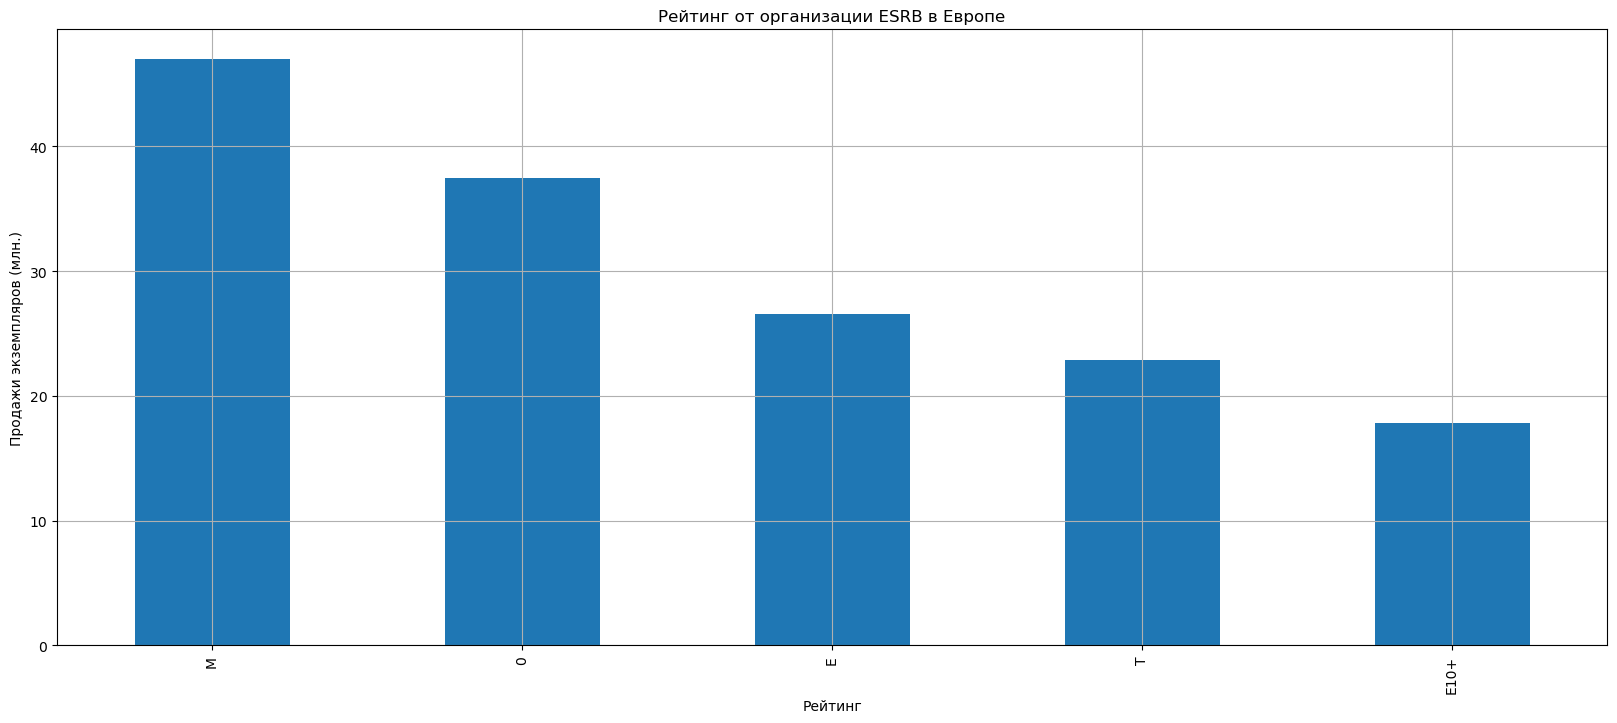

In [135]:
#  Рейтинг от организации ESRB в Европе
#группируем по жанрам
rating_evro = data.groupby('рейтинг ESRB')['продажи в Европе'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'рейтинг ESRB', y = 'продажи в Европе', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы (топ-5)
- PS2,
- PS3,
- X360, 
- Wii,
- PS.

Самые популярные жанры (топ-5) 
- Action,
- Sports, 
- Shooter,
- Racing,
- Misc 


                         Для пользователя региона (Япония): 

In [136]:
# сводная таблица Японии
data_JP = data.pivot_table(
    index = 'платформа',
    values = 'продажи в Японии', 
    aggfunc = 'sum').sort_values('продажи в Японии', ascending = False)
data_JP = data_JP[0:5]
data_JP

,продажи в Японии
платформа,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


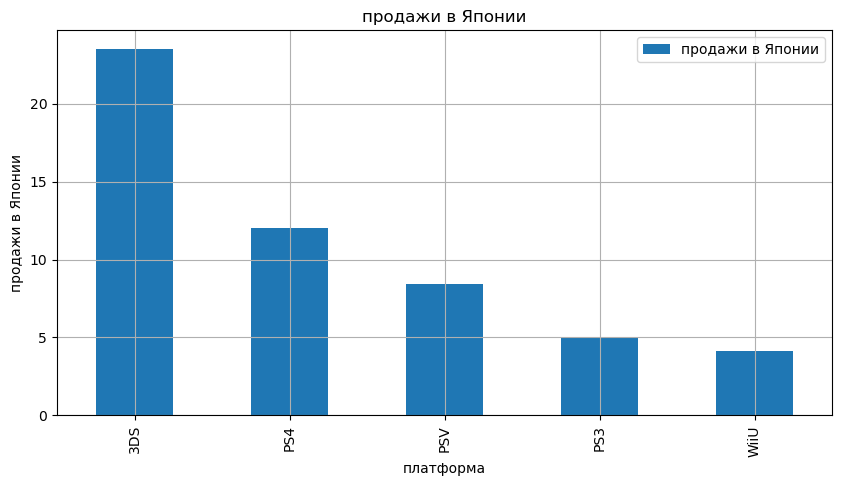

In [137]:
data_JP.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в Японии')
plt.xlabel('платформа')
plt.ylabel('продажи в Японии')
plt.show()

In [138]:
# сводная таблица Японии
data_JP_1 = data.pivot_table(
    index = 'жанр_игры',
    values = 'продажи в Японии', 
    aggfunc = 'sum').sort_values('продажи в Японии', ascending = False)
data_JP_1 = data_JP_1[0:5]
data_JP_1

,продажи в Японии
жанр_игры,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


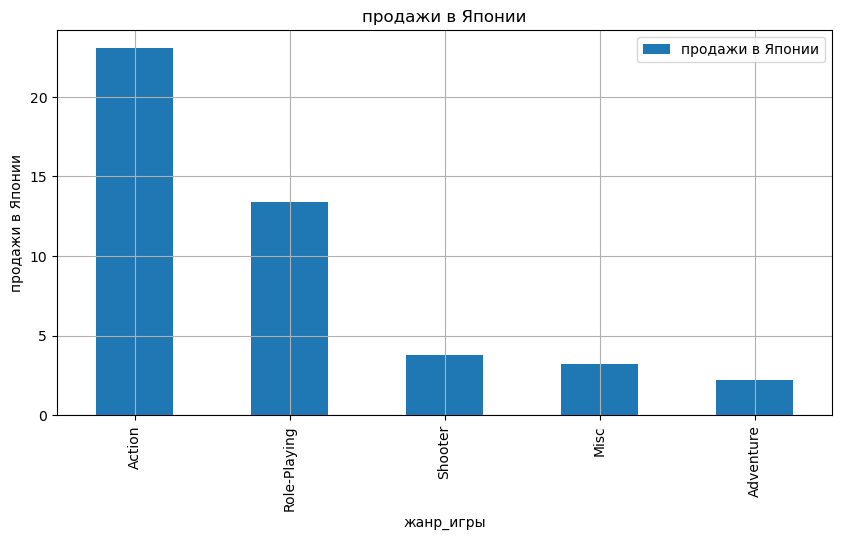

In [139]:
data_JP_1.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в Японии')
plt.xlabel('жанр_игры')
plt.ylabel('продажи в Японии')
plt.show()

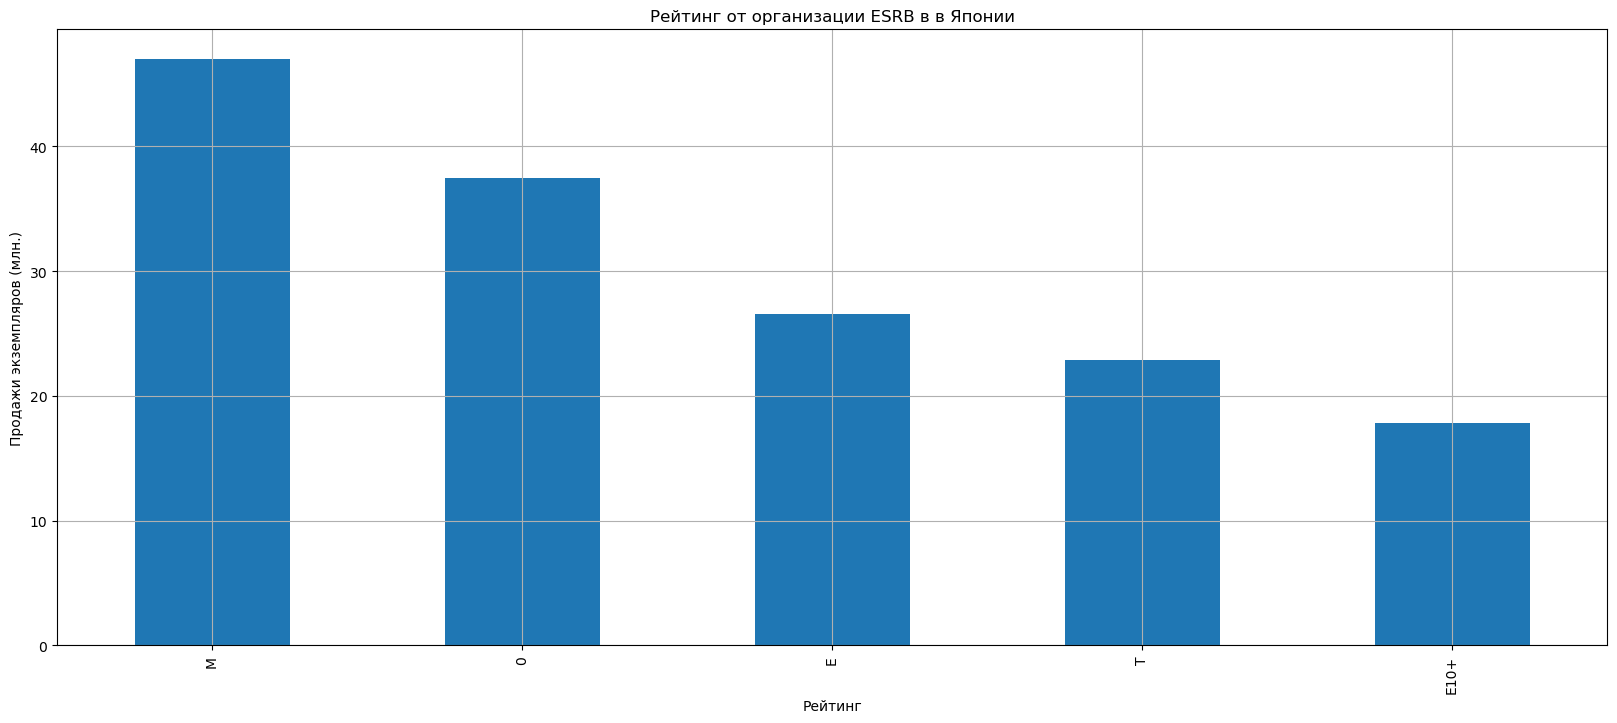

In [140]:
#  Рейтинг от организации ESRB в Японии
#группируем по жанрам
rating_evro = data.groupby('рейтинг ESRB')['продажи в Японии'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'рейтинг ESRB', y = 'продажи в Японии', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы (топ-5)
- DS,
- PS,
- PS2,
- SNES, 
- 3DS.


Самые популярные жанры (топ-5) 
- Role-Playing, 
- Action,
- Sports,
- Platform, 
- Misc. 

                        Для пользователя региона (Другие страны): 

In [141]:
# сводная таблица др.стран
data_DR = data.pivot_table(
    index = 'платформа',
    values = 'продажи в др.странах', 
    aggfunc = 'sum').sort_values('продажи в др.странах', ascending = False)
data_DR = data_DR[0:5]
data_DR

,продажи в др.странах
платформа,
PS4,28.70
XOne,7.71
PS3,2.49
3DS,1.67
WiiU,1.48


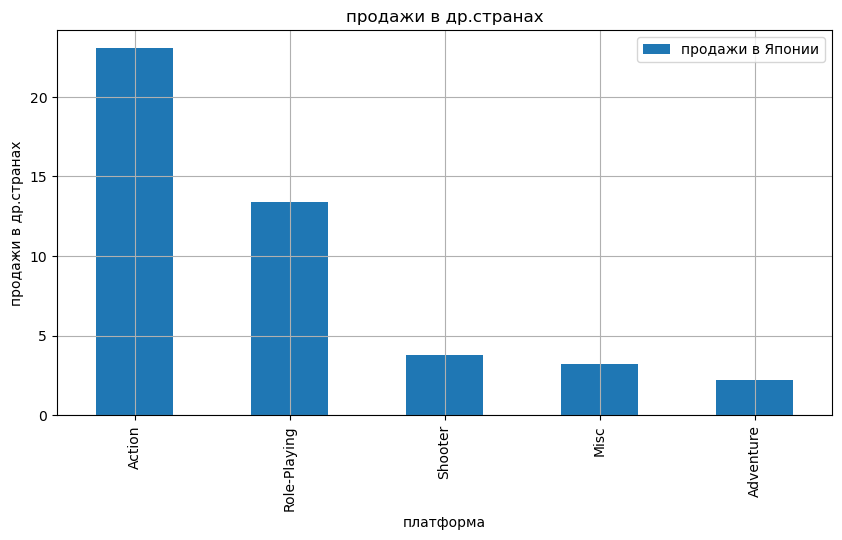

In [142]:
data_JP_1.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в др.странах')
plt.xlabel('платформа')
plt.ylabel('продажи в др.странах')
plt.show()

In [143]:
data_DR_1 = data.pivot_table(
    index = 'жанр_игры',
    values = 'продажи в др.странах', 
    aggfunc = 'sum').sort_values('продажи в др.странах', ascending = False)
data_DR_1 = data_DR_1[0:5]
data_DR_1

,продажи в др.странах
жанр_игры,
Shooter,13.48
Action,10.58
Sports,8.55
Role-Playing,5.38
Fighting,1.57


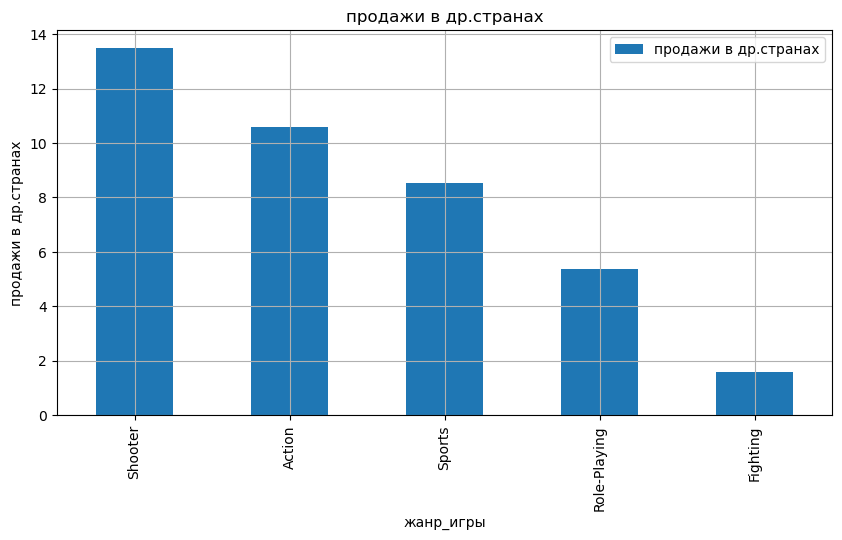

In [144]:
data_DR_1.plot(grid=True,kind = 'bar', figsize=(10, 5))
plt.title('продажи в др.странах')
plt.xlabel('жанр_игры')
plt.ylabel('продажи в др.странах')
plt.show()

Самые популярные платформы (топ-5) 
- PS2,
- PS3, 
- X360,
- Wii,
- DS		


Самые популярные жанры (топ-5)
- Action, 
- Sports,
- Shooter,
- Racing, 
- Misc 

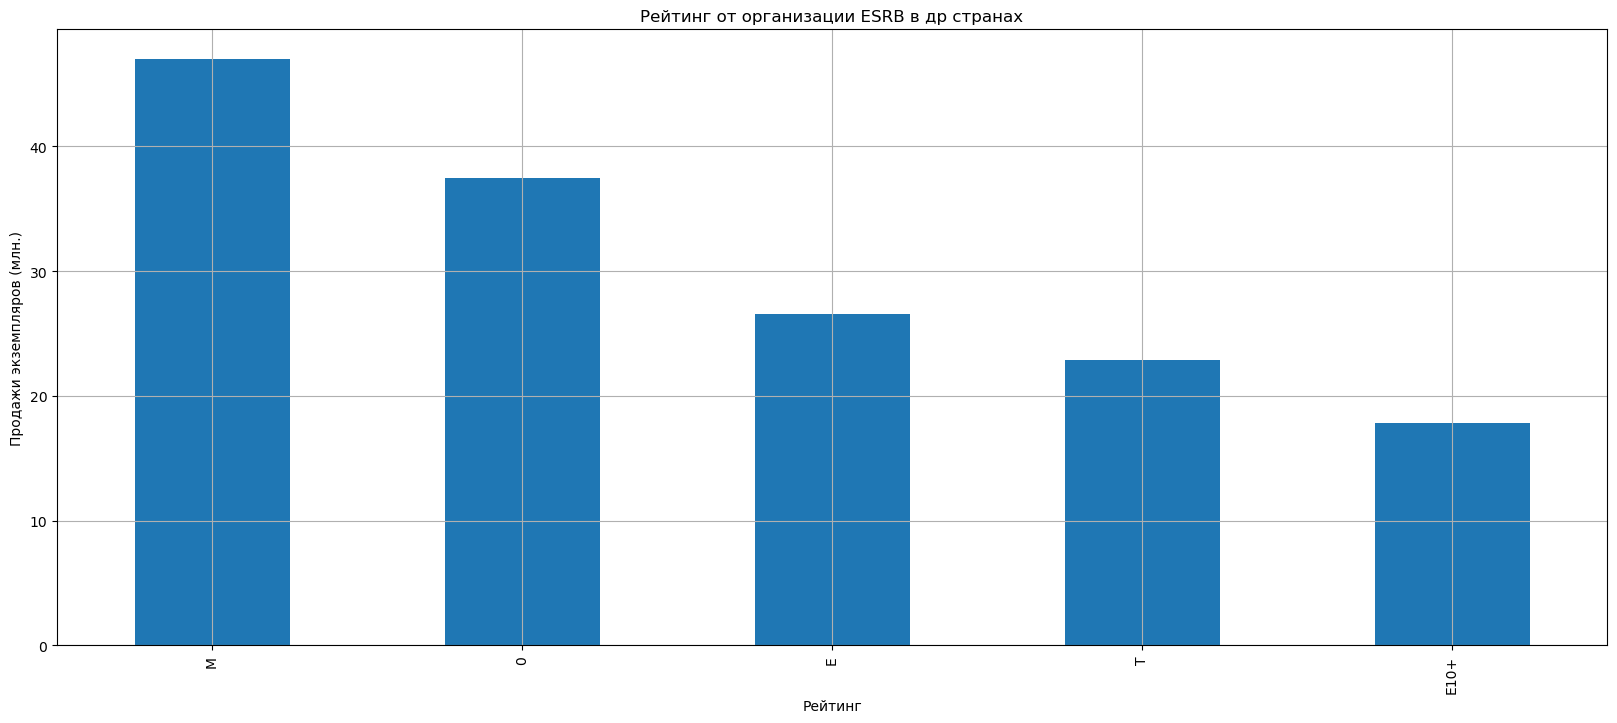

In [145]:
#  Рейтинг от организации ESRB в др странах
#группируем по жанрам
rating_evro = data.groupby('рейтинг ESRB')['продажи в др.странах'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'рейтинг ESRB', y = 'продажи в др.странах', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в др странах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

**Вывод по составлению портрета пользователя каждого региона**

    Самые популярные игровые платформы в Северной Америке это: 
    
- XBOX, 
- PS2, 
- WII,
- PS3,
- DS 


    Топ 5 жанров в Северной Америке :
    
- action,
- sports, 
- shooter,
- platform, 
- misc 

По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"




    Самые популярные игровые платформы в Европе это:
- PS2,
- PS3,
- XBOX,
- WII,
- PS 

     Топ 5 жанров в Европе : 
- action,
- sports,
- shooter,
- racing,
- misc 

По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

    Самые популярные игровые платформы в Японии это:
- DS,
- PS,
- PS2,
- SNES,
- 3DS 

   Топ 5 жанров в Японии :
- Role-Playing,
- action,
- sports,
- platform,
- misc 

По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если брать данные за последний год:

    То в Северной Америке:
- топ игровых платформ выглядит так: PS4, Xone, DS3
- топ Жанров игр: Shooter, Action, Sports
- топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"


    В Европейском союзе:
- топ игровых платформ : PS4, Xone, PC
- топ жанров: Shooter, Sports, Action
- топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


   В Японии:
- топ игровых платформ : 3DS, PS4, PSV
- топ жанров: Action, Role-playing, Adventure
- топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"


Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

In [146]:
data.head(10)

,название игры,платформа,год_выпуска,жанр_игры,продажи в С.Америке(млн),продажи в Европе,продажи в Японии,продажи в др.странах,оценка критиков,оценка пользователей,рейтинг ESRB,суммарные_продажи
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,0,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,0,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0,0.0,0,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49


# Гипотезы

                                               1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

Нулевая гипотеза 

H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза 

H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [147]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = data[(data_all['платформа']=='XOne') & (data_all['год_выпуска']>2006)]['оценка пользователей']
pc_hyp = data[(data_all['платформа']=='PS4') & (data_all['год_выпуска']>2006)]['оценка пользователей']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

4.740119760479042

In [148]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

4.325249169435216

In [149]:
from scipy import stats as st
import numpy as np
import pandas as pd

#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.05

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19386186173920508
Не получилось отвергнуть нулевую гипотезу


*Вывод:*

Значение p-value равно чуть меньше 1%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 1% можно получить различность рейтингов двух платформ

                                          2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:c

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [150]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = data[(data['платформа']=='XOne') & (data['год_выпуска']>2006)]['оценка пользователей']
genre_sports_hyp = data[(data['платформа']=='PS4') & (data['год_выпуска']>2006)]['оценка пользователей']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

4.740119760479042

In [151]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

4.325249169435216

In [152]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.05

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19386186173920508
Не получилось отвергнуть нулевую гипотезу


Вывод по проверке гипотез

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Нулевую гипотезу не удалось опровергнуть.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
по взятым из них выборкам используем t-тест: scipy.stats.ttest_ind (array1, array2, equal_var).

**Общий вывод**

Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы.
Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа


Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS

Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет.
Самый пик продаж наступает примерно через 5 лет после выпуска консоли
Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус
Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии

После мы составили портреты пользователей каждого региона.

Выяснили, что в Северной Америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".


В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.


В Японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.